fundamentals

https://towardsdatascience.com/sigmoid-activation-and-binary-crossentropy-a-less-than-perfect-match-b801e130e31

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

overfitting and feature selection

https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

https://medium.com/@kapilvarshney/how-to-plot-the-model-training-in-keras-using-custom-callback-function-and-using-tensorboard-41e4ce3cb401

http://krasserm.github.io/2019/03/14/bayesian-neural-networks/

---
https://www.google.com/search?client=firefox-b-1-d&q=keras+feature+selection

https://stackoverflow.com/questions/50199217/feature-selection-on-a-keras-model

keras sensitivity analysis

https://www.google.com/search?client=firefox-b-1-d&q=keras+sensitivity+analysis
    
https://stackoverflow.com/questions/44119207/is-there-any-way-to-get-variable-importance-with-keras



auto-keras

http://www.google.com/search?q=auto-keras

http://www.google.com/search?q=auto-keras+binary+classifier

classification on imbalanced data

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

x_train = pd.read_csv("60daysData.csv")
x_test = pd.read_csv("10daysTesting.csv")
y_test = x_test[["event"]]
y_train = x_train[["event"]]
del x_test["event"]
del x_train["event"]
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values
#x_test = 1 - x_test
#y_test = 1 - y_test
y_train = y_train.transpose()[0]
y_test = y_test.transpose()[0]
x_test_orig = x_test
y_test_orig = y_test
featureCnt = x_train[1]
x_train.shape

(23816, 1963)

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU')]

In [ ]:
# optional phase: partition test data and select a partition
windownbr = 12
windowsize = 300
x_test = x_test_orig[windowsize * windownbr:(windowsize*windownbr)+windowsize,]
y_test = y_test_orig[windowsize * windownbr:(windowsize*windownbr)+windowsize,]
x_test.shape

<IPython.core.display.Javascript object>


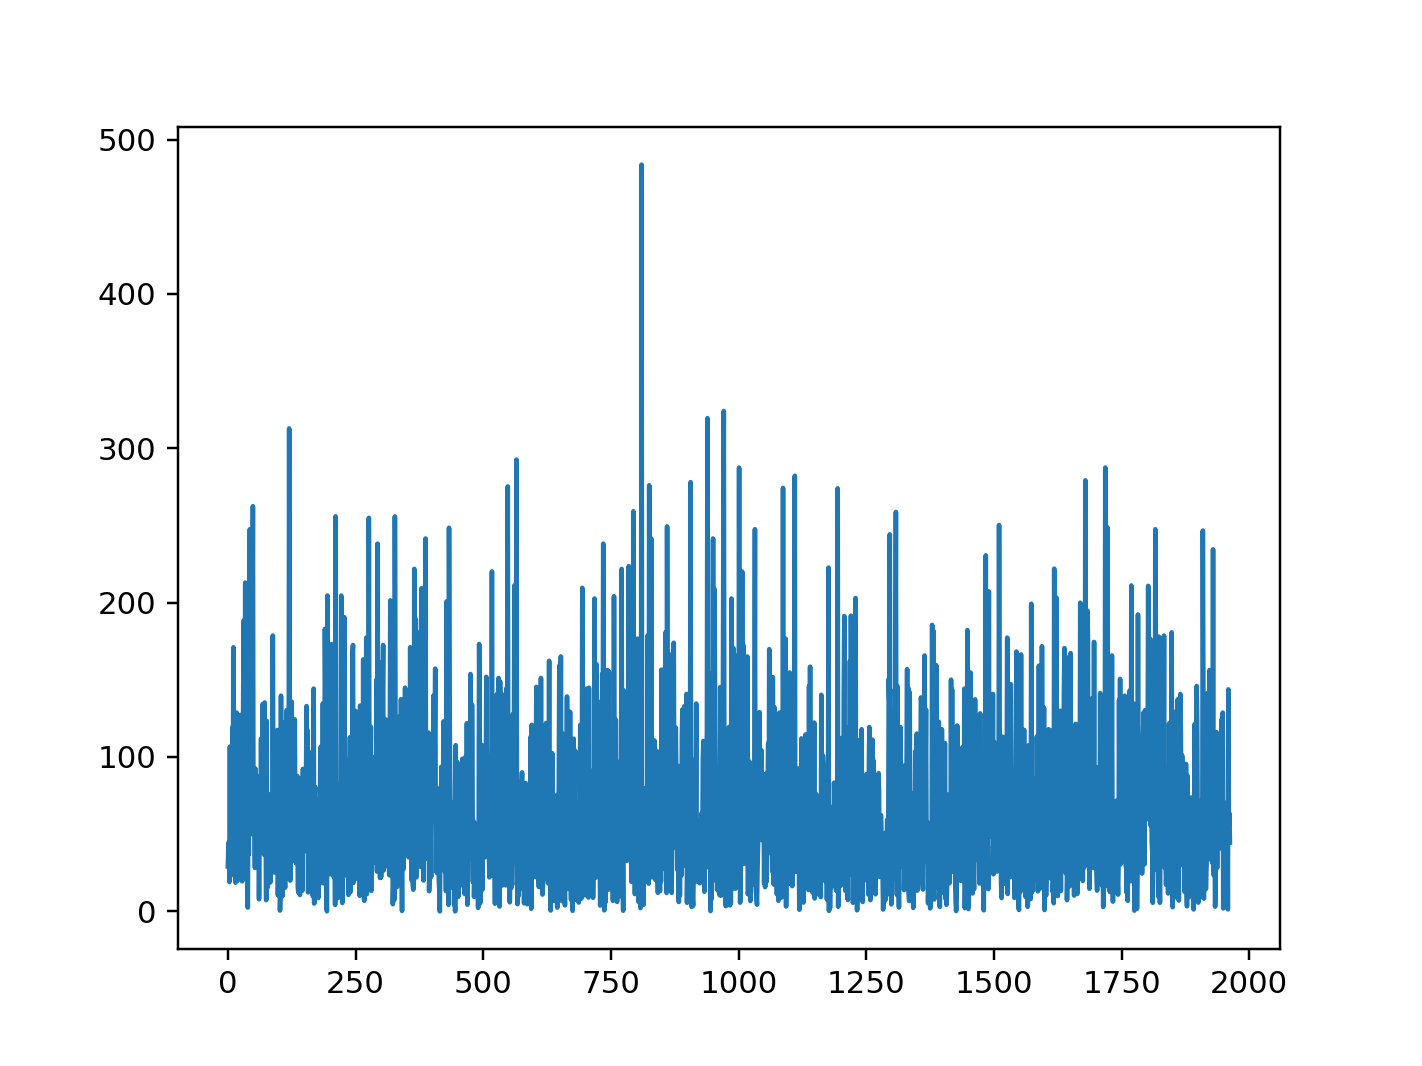

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib notebook
import matplotlib.pyplot as plt

x_train_orig = x_train
y_train_orig = y_train

selector = SelectKBest(f_classif, k=1000)
selected_features = selector.fit_transform(x_train, y_train)
plt.plot(selector.scores_)

featureCnt = 150
f_score_indexes = (-selector.scores_).argsort()[:featureCnt]
x_train = x_train_orig[:,f_score_indexes]
x_test = x_test_orig[:,f_score_indexes]

In [13]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
def ExecuteTest(runCount):
    def PrintReport():
        y_pred = model.predict(x_test)
        np.set_printoptions(threshold=np.inf)
        y_pred = y_pred.transpose()[0]
        y_pred[y_pred > 0.1]=1
        y_pred[y_pred <= 0.1]=0
        total_positive = sum(y_pred)
        total_positive
        t1 = y_pred - y_test
        fp = t1
        fp[fp < 0] = 0
        fp = sum(fp)
        tp = total_positive - fp
        fn = t1
        fn[fn>=0]=0
        fn = 1 - fn

        diff = y_test - y_pred
        fp = -1*sum(diff[diff == -1])
        fn = sum(diff[diff==1])
        tn = y_test.shape[0] - sum(y_test) - fn
        print('True positives: ', tp)
        print('False positives: ', fp )
        print('True negatives: ', tn)
        print('False negatives: ', fn)
        tn = y_test.shape[0] - tp - fp - fn
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall)/ (precision + recall)
        print('precision: ', precision)
        print('recall: ', recall)
        print('f1: ', f1)
        
    for x in range(runCount):
        model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(500, activation='sigmoid'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(500, activation='sigmoid'),
          tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        model.compile(
            # top performers @500X500 : adamax ~.58, nadam ~ .57, adam ~.53, rmsprop?
            optimizer='adam', #adam, rmsprop, adadelta, adagrad, adamax, ftrl
            loss='binary_crossentropy',
            metrics=[
                keras.metrics.Precision(), 
                keras.metrics.Recall(), 
                keras.metrics.TruePositives(), 
                keras.metrics.FalsePositives()]
        )

        model.fit(
                x_train, 
                y_train, 
                epochs=30, 
                shuffle=False,
                callbacks=[es_callback],
                validation_split = .2
                )
        model.evaluate(x_test, y_test)
        PrintReport()

ExecuteTest(10)

Epoch 1/30
596/596 [==============================] - 3s 5ms/step - loss: 0.1060 - precision_49: 0.6220 - recall_49: 0.1014 - true_positives_49: 51.0000 - false_positives_49: 31.0000 - val_loss: 0.0492 - val_precision_49: 0.7234 - val_recall_49: 0.3820 - val_true_positives_49: 34.0000 - val_false_positives_49: 13.0000
Epoch 2/30
596/596 [==============================] - 2s 4ms/step - loss: 0.0814 - precision_49: 0.7260 - recall_49: 0.3002 - true_positives_49: 151.0000 - false_positives_49: 57.0000 - val_loss: 0.0477 - val_precision_49: 0.7347 - val_recall_49: 0.4045 - val_true_positives_49: 36.0000 - val_false_positives_49: 13.0000
Epoch 3/30
596/596 [==============================] - 2s 4ms/step - loss: 0.0764 - precision_49: 0.7043 - recall_49: 0.3221 - true_positives_49: 162.0000 - false_positives_49: 68.0000 - val_loss: 0.0459 - val_precision_49: 0.6964 - val_recall_49: 0.4382 - val_true_positives_49: 39.0000 - val_false_positives_49: 17.0000
Epoch 4/30
596/596 [==================

 18/596 [..............................] - ETA: 1s - loss: 0.2658 - precision_52: 0.0357 - recall_52: 0.0625 - true_positives_52: 1.0000 - false_positives_52: 27.0000

KeyboardInterrupt: 

In [ ]:
import random as rand
def balance(x_train, y_train, targetSize):
    todelete = dict()
    while len(todelete) < targetSize:
        max_index = y_train.shape[0] - 1
        curidx = rand.randrange(0,max_index)
        if y_train[curidx] == 0 :
            todelete[curidx] = curidx
            
    y_train = np.delete(y_train,list(todelete.keys()),0)
    x_train = np.delete(x_train,list(todelete.keys()),0)
    return x_train, y_train
            
x_train, y_train = balance(x_train, y_train, 10000)

In [14]:
x_train.shape

(23816, 150)